In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("LoanExport.csv")

In [5]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [6]:
df.shape

(291451, 28)

In [7]:
# Check for Null Values and remove them
print("Number of Null values in each column:")
print(df.isnull().sum())

Number of Null values in each column:
CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


In [8]:
df = df.dropna()

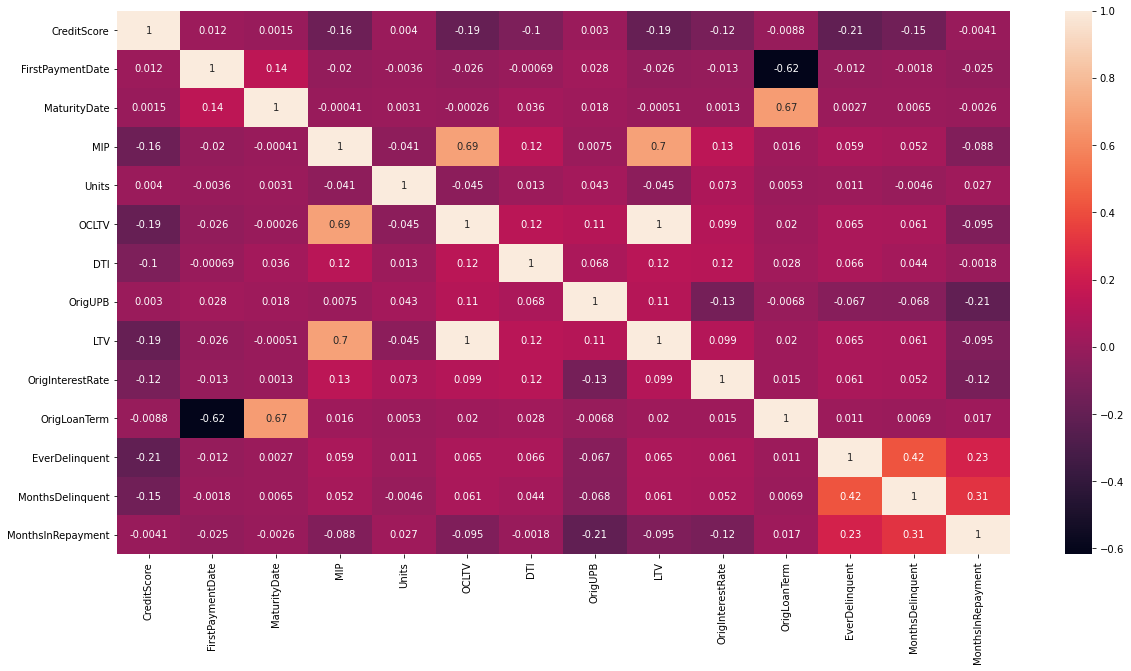

In [9]:
# Check Correlation between all features using heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot =True)
plt.show()

In [10]:
# Remove unnecessary columns
df = df.drop(["FirstPaymentDate","MaturityDate","MSA","Occupancy","ProductType","SellerName","ServicerName","PropertyState","NumBorrowers","Channel"], axis=1)

In [11]:
# List Numerical Features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Features:", len(numerical_features))
numerical_features

Numerical Features: 12


['CreditScore',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment']

In [12]:
# List Categorical Features
categorical_features = df.select_dtypes(include=[np.object]).columns.tolist()
print("Categorical Features:", len(categorical_features))
categorical_features

Categorical Features: 6


C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['FirstTimeHomebuyer',
 'PPM',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose']

In [13]:
# List Continuous Features
continuous_features = [feat for feat in numerical_features if len(df[feat].unique()) > 10]
print("Continuous Features:", len(continuous_features))
continuous_features

Continuous Features: 10


['CreditScore',
 'MIP',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'MonthsDelinquent',
 'MonthsInRepayment']

In [14]:
# List Discrete Features
discrete_features = [feat for feat in numerical_features if len(df[feat].unique()) <= 10]
print("Discrete Features:", len(discrete_features))
discrete_features

Discrete Features: 2


['Units', 'EverDelinquent']

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


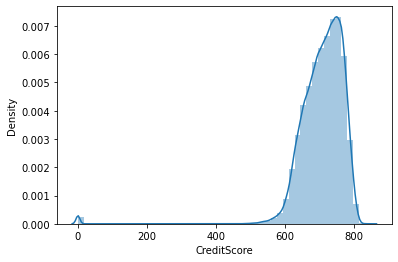

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


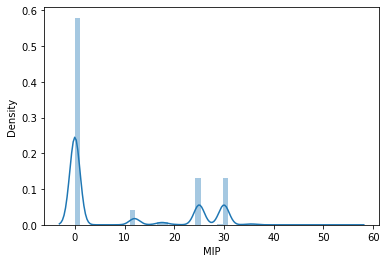

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


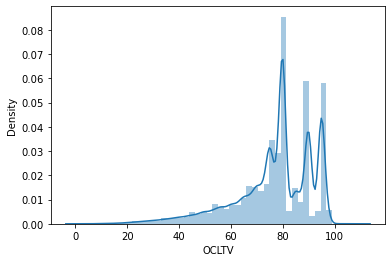

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


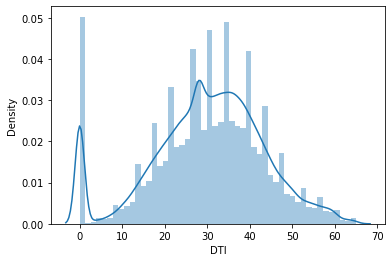

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


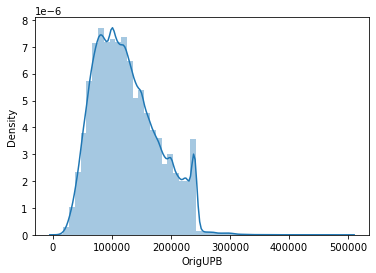

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


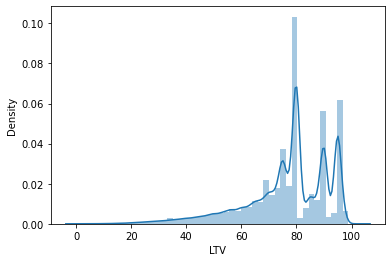

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


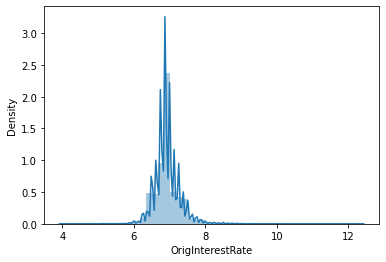

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


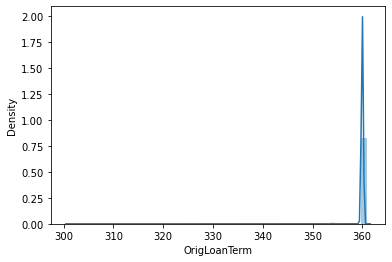

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


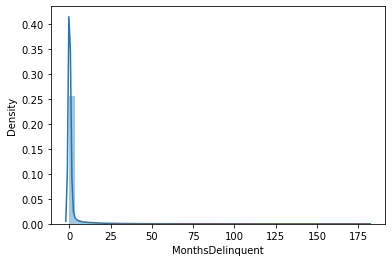

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


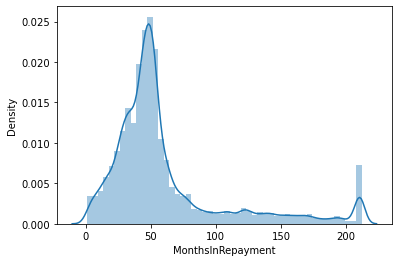

In [15]:
# Plot distribution of Continuous Features
for feature in continuous_features:
    sns.distplot(df[feature])
    plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    213642
1     52815
Name: EverDelinquent, dtype: int64

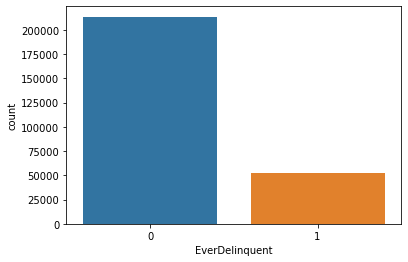

In [16]:
sns.countplot(df['EverDelinquent'])
df['EverDelinquent'].value_counts()

In [17]:
def predict_outliers(continuous_features):
    for feature in continuous_features:
        sns.boxplot(y = df[feature])
        plt.ylabel(feature)
        plt.title(feature.title() + " " + "Distribution")
        plt.show()

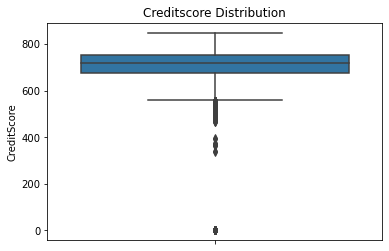

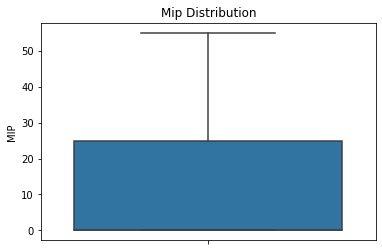

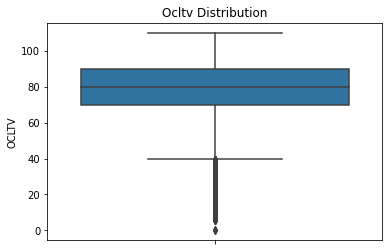

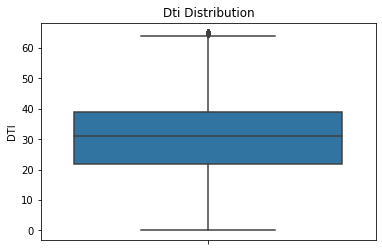

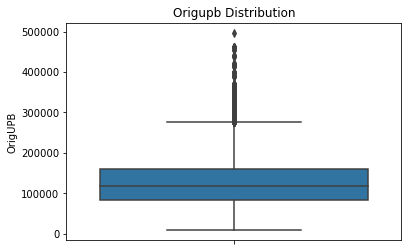

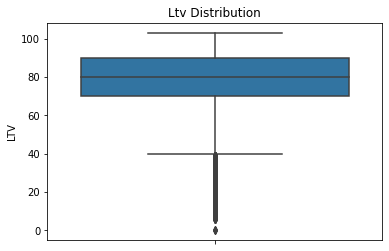

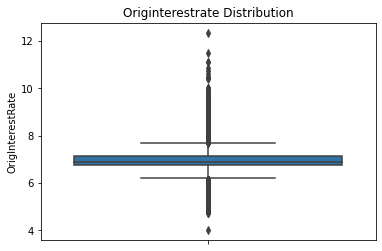

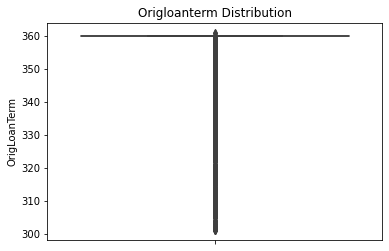

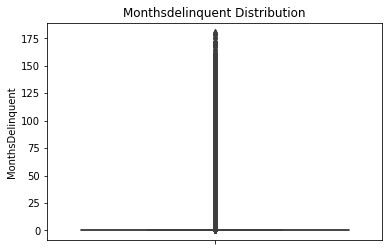

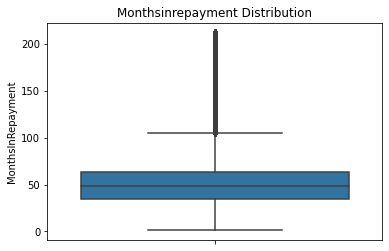

In [18]:
predict_outliers(continuous_features)

In [19]:
df.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000
mean,708.915097,9.121085,1.025907,76.883970,30.038708,125240.057495,76.862818,6.928868,359.826565,0.198212,1.831083,60.637994
std,68.301151,12.619794,0.202276,15.192873,13.338958,53451.469470,15.182675,0.346160,2.354774,0.398654,8.760016,45.773241
min,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,35.000000
50%,717.000000,0.000000,1.000000,80.000000,31.000000,118000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [20]:
# replacing the 0 with 850
df['CreditScore'] = np.where(df['CreditScore'] == 0, 850, df['CreditScore'])
np.sort(df.CreditScore.unique())

array([335, 342, 363, 366, 370, 375, 391, 396, 466, 471, 476, 477, 478,
       479, 481, 482, 483, 485, 486, 487, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572,
       573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585,
       586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598,
       599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611,
       612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624,
       625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637,
       638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 64

In [22]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['CreditScore'])

df['CreditScore']=np.where(df['CreditScore']>uppvisib,uppvisib,df['CreditScore'])
df['CreditScore']=np.where(df['CreditScore']<lowvisib,lowvisib,df['CreditScore'])

In [23]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['OCLTV'])

df['OCLTV']=np.where(df['OCLTV']>uppvisib,uppvisib,df['OCLTV'])
df['OCLTV']=np.where(df['OCLTV']<lowvisib,lowvisib,df['OCLTV'])

In [24]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['DTI'])

df['DTI']=np.where(df['DTI']>uppvisib,uppvisib,df['DTI'])
df['DTI']=np.where(df['DTI']<lowvisib,lowvisib,df['DTI'])

In [25]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['OrigUPB'])

df['OrigUPB']=np.where(df['OrigUPB']>uppvisib,uppvisib,df['OrigUPB'])
df['OrigUPB']=np.where(df['OrigUPB']<lowvisib,lowvisib,df['OrigUPB'])

In [26]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['LTV'])

df['LTV']=np.where(df['LTV']>uppvisib,uppvisib,df['LTV'])
df['LTV']=np.where(df['LTV']<lowvisib,lowvisib,df['LTV'])

In [27]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['OrigInterestRate'])

df['OrigInterestRate']=np.where(df['OrigInterestRate']>uppvisib,uppvisib,df['OrigInterestRate'])
df['OrigInterestRate']=np.where(df['OrigInterestRate']<lowvisib,lowvisib,df['OrigInterestRate'])

In [28]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

lowvisib,uppvisib=handle_outlier(df['MonthsInRepayment'])

df['MonthsInRepayment']=np.where(df['MonthsInRepayment']>uppvisib,uppvisib,df['MonthsInRepayment'])
df['MonthsInRepayment']=np.where(df['MonthsInRepayment']<lowvisib,lowvisib,df['MonthsInRepayment'])

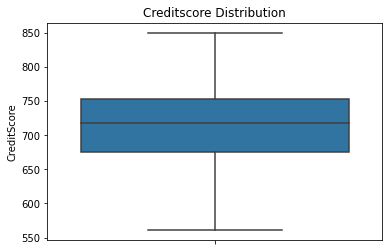

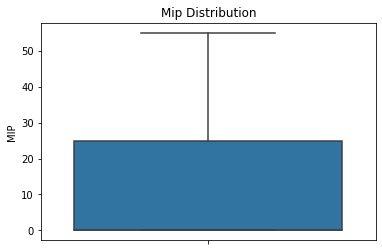

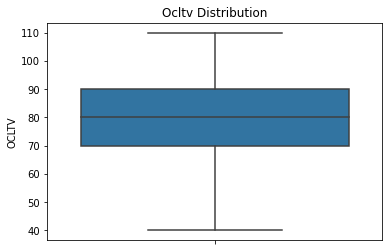

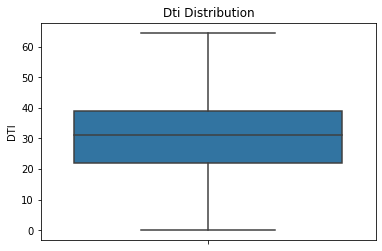

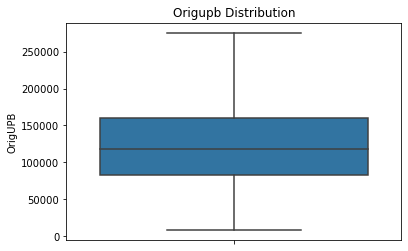

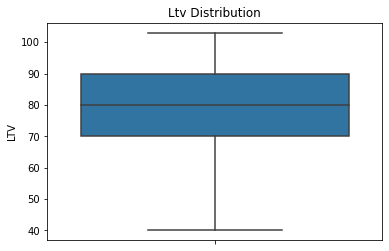

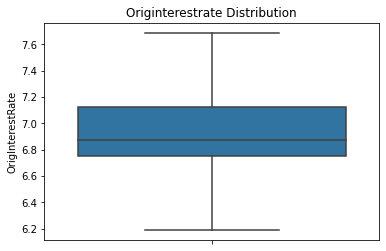

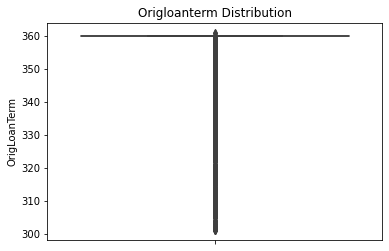

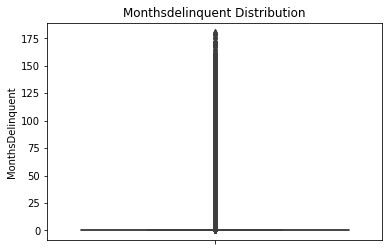

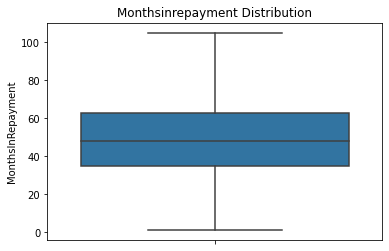

In [29]:
predict_outliers(continuous_features)

In [30]:
df.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000,266457.000000
mean,712.452897,9.121085,1.025907,77.162488,30.038342,125154.131811,77.141456,6.921583,359.826565,0.198212,1.831083,52.923736
std,51.631159,12.619794,0.202276,14.359909,13.338006,53157.997837,14.349158,0.303643,2.354774,0.398654,8.760016,27.221733
min,560.500000,0.000000,0.000000,40.000000,0.000000,8000.000000,40.000000,6.187500,301.000000,0.000000,0.000000,1.000000
25%,676.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,35.000000
50%,718.000000,0.000000,1.000000,80.000000,31.000000,118000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,850.000000,55.000000,4.000000,110.000000,64.500000,275500.000000,103.000000,7.687500,361.000000,1.000000,180.000000,105.000000


## CreditScore > CreditRange

In [31]:
np.sort(df.CreditScore.unique())

array([560.5, 561. , 562. , 563. , 564. , 565. , 566. , 567. , 568. ,
       569. , 570. , 571. , 572. , 573. , 574. , 575. , 576. , 577. ,
       578. , 579. , 580. , 581. , 582. , 583. , 584. , 585. , 586. ,
       587. , 588. , 589. , 590. , 591. , 592. , 593. , 594. , 595. ,
       596. , 597. , 598. , 599. , 600. , 601. , 602. , 603. , 604. ,
       605. , 606. , 607. , 608. , 609. , 610. , 611. , 612. , 613. ,
       614. , 615. , 616. , 617. , 618. , 619. , 620. , 621. , 622. ,
       623. , 624. , 625. , 626. , 627. , 628. , 629. , 630. , 631. ,
       632. , 633. , 634. , 635. , 636. , 637. , 638. , 639. , 640. ,
       641. , 642. , 643. , 644. , 645. , 646. , 647. , 648. , 649. ,
       650. , 651. , 652. , 653. , 654. , 655. , 656. , 657. , 658. ,
       659. , 660. , 661. , 662. , 663. , 664. , 665. , 666. , 667. ,
       668. , 669. , 670. , 671. , 672. , 673. , 674. , 675. , 676. ,
       677. , 678. , 679. , 680. , 681. , 682. , 683. , 684. , 685. ,
       686. , 687. ,

In [32]:
conditions = [(df['CreditScore']< 650),
             (df['CreditScore']>=650) & (df['CreditScore']<700),
             (df['CreditScore']>=700) & (df['CreditScore']<750),
             (df['CreditScore']>=750) & (df['CreditScore']<851)]

values = ['Poor','Fair','Good','Excellent']

df['CreditRange'] = np.select(conditions,values)

In [33]:
df['CreditRange'].value_counts()

Good         90411
Excellent    73532
Fair         67562
Poor         34952
Name: CreditRange, dtype: int64

In [34]:
# 0-Execellent, 1-Fair, 2-Good, 3-Poor

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['CreditRange']= label_encoder.fit_transform(df['CreditRange'])
  
df['CreditRange'].value_counts()

2    90411
0    73532
1    67562
3    34952
Name: CreditRange, dtype: int64

## LTV > LTVRange

In [35]:
np.sort(df.LTV.unique())

array([ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 103.])

In [36]:
conditions = [(df['LTV']< 50),
             (df['LTV']>=50) & (df['LTV']<75),
             (df['LTV']>=75) & (df['LTV']<110)]

values = ['Low','Medium','High']

df['LTVRange'] = np.select(conditions,values)

In [37]:
df['LTVRange'].value_counts()

High      181386
Medium     67539
Low        17532
Name: LTVRange, dtype: int64

In [38]:
# 0-High, 1-Low, 2-Medium

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['LTVRange']= label_encoder.fit_transform(df['LTVRange'])
  
df['LTVRange'].value_counts()

0    181386
2     67539
1     17532
Name: LTVRange, dtype: int64

## DTI > DTI_Range

In [39]:
np.sort(df.DTI.unique())

array([ 0. ,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ,
       11. , 12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. ,
       22. , 23. , 24. , 25. , 26. , 27. , 28. , 29. , 30. , 31. , 32. ,
       33. , 34. , 35. , 36. , 37. , 38. , 39. , 40. , 41. , 42. , 43. ,
       44. , 45. , 46. , 47. , 48. , 49. , 50. , 51. , 52. , 53. , 54. ,
       55. , 56. , 57. , 58. , 59. , 60. , 61. , 62. , 63. , 64. , 64.5])

In [40]:
conditions = [(df['DTI']< 25),
             (df['DTI']>=25) & (df['DTI']<50),
             (df['DTI']>=50) & (df['DTI']<66)]

values = ['Low','Medium','High']

df['DTI_Range'] = np.select(conditions,values)

In [41]:
df['DTI_Range'].value_counts()

Medium    169750
Low        80382
High       16325
Name: DTI_Range, dtype: int64

In [42]:
# 0-High, 1-Low, 2-Medium

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['DTI_Range']= label_encoder.fit_transform(df['DTI_Range'])
  
df['DTI_Range'].value_counts()

2    169750
1     80382
0     16325
Name: DTI_Range, dtype: int64

## MIP > MIP_Range

In [43]:
np.sort(df.MIP.unique())

array([ 0,  1,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 45, 47, 50,
       52, 55], dtype=int64)

In [44]:
conditions = [(df['MIP']< 20),
             (df['MIP']>=20) & (df['MIP']<40),
             (df['MIP']>=40) & (df['MIP']<56)]

values = ['Low','Medium','High']

df['MIP_Range'] = np.select(conditions,values)

In [45]:
df['MIP_Range'].value_counts()

Low       186962
Medium     79479
High          16
Name: MIP_Range, dtype: int64

In [46]:
# 0-High, 1-Low, 2-Medium

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['MIP_Range']= label_encoder.fit_transform(df['MIP_Range'])
  
df['MIP_Range'].value_counts()

1    186962
2     79479
0        16
Name: MIP_Range, dtype: int64

## MonthsInRepayment > Years_Repayment

In [47]:
np.sort(df.MonthsInRepayment.unique())

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105.])

In [48]:
import math
df['Years_Repayment'] = df['MonthsInRepayment'].apply(lambda x:math.trunc(x/12))

In [49]:
df['Years_Repayment'].value_counts()

4    62379
3    59353
2    40923
8    40160
5    19592
1    19099
6     9921
0     9689
7     5341
Name: Years_Repayment, dtype: int64

## Years_Repayment > RepayRange

In [50]:
np.sort(df.Years_Repayment.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [51]:
conditions = [(df['Years_Repayment']< 2),
             (df['Years_Repayment']>=2) & (df['Years_Repayment']<4),
             (df['Years_Repayment']>=4) & (df['Years_Repayment']<6),
             (df['Years_Repayment']>=6) & (df['Years_Repayment']<8),
             (df['Years_Repayment']>=8) & (df['Years_Repayment']<10),]

values = ['0-2','2-4','4-6','6-8','8-10']

df['RepayRange'] = np.select(conditions,values)

In [52]:
df['RepayRange'].value_counts()

2-4     100276
4-6      81971
8-10     40160
0-2      28788
6-8      15262
Name: RepayRange, dtype: int64

In [53]:
# 0-[0-2], 1-[2-4], 2-[4-6], 3-[6-8], 4-[8-10]

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['RepayRange']= label_encoder.fit_transform(df['RepayRange'])
  
df['RepayRange'].value_counts()

1    100276
2     81971
4     40160
0     28788
3     15262
Name: RepayRange, dtype: int64

## OrigLoanTerm > LoanTermYears

In [54]:
np.sort(df.OrigLoanTerm.unique())

array([301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
       340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
       353, 354, 355, 356, 357, 358, 359, 360, 361], dtype=int64)

In [55]:
import math
df['LoanTermYears'] = df['OrigLoanTerm'].apply(lambda x:math.trunc(x/12))

In [56]:
df['LoanTermYears'].value_counts()

30    264183
29      1023
28       474
27       415
26       225
25       137
Name: LoanTermYears, dtype: int64

## FirstTimeHomebuyer

In [57]:
np.sort(df.FirstTimeHomebuyer.unique())

array(['N', 'X', 'Y'], dtype=object)

In [58]:
df['FirstTimeHomebuyer'].replace({'X':np.nan},inplace=True)
df = df.dropna(subset=['FirstTimeHomebuyer'])

In [59]:
np.sort(df.FirstTimeHomebuyer.unique())

array(['N', 'Y'], dtype=object)

In [60]:
df['IsFirstTime'] = np.where(df['FirstTimeHomebuyer'] == 'Y', 1, 0)

In [61]:
np.sort(df.IsFirstTime.unique())

array([0, 1])

## PPM

In [62]:
np.sort(df.PPM.unique())

array(['N', 'X', 'Y'], dtype=object)

In [63]:
df['PPM'].replace({'X':np.nan},inplace=True)
df = df.dropna(subset=['PPM'])

In [64]:
np.sort(df.PPM.unique())

array(['N', 'Y'], dtype=object)

In [65]:
df['PPM'] = np.where(df['PPM'] == 'Y', 1, 0)

In [66]:
np.sort(df.PPM.unique())

array([0, 1])

In [67]:
df.head(10)

,CreditScore,FirstTimeHomebuyer,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PPM,...,MonthsDelinquent,MonthsInRepayment,CreditRange,LTVRange,DTI_Range,MIP_Range,Years_Repayment,RepayRange,LoanTermYears,IsFirstTime
0,850.0,N,25,1,89.0,27.0,117000.0,89.0,6.750,0,...,0,52.0,0,0,2,2,4,2,30,0
1,850.0,N,0,1,73.0,17.0,109000.0,73.0,6.500,0,...,0,105.0,0,2,1,1,8,4,30,0
2,850.0,N,0,1,75.0,16.0,88000.0,75.0,6.875,0,...,0,67.0,0,0,1,1,5,2,30,0
3,850.0,N,0,1,76.0,14.0,160000.0,76.0,6.875,0,...,0,35.0,0,0,1,1,2,1,30,0
4,850.0,N,0,1,78.0,18.0,109000.0,78.0,7.125,0,...,0,54.0,0,0,1,1,4,2,30,0
5,850.0,N,25,1,89.0,40.0,207000.0,89.0,7.125,0,...,0,42.0,0,0,2,2,3,1,30,0
6,850.0,N,25,1,90.0,21.0,111000.0,90.0,6.875,0,...,0,44.0,0,0,1,2,3,1,30,0
9,850.0,Y,30,1,95.0,27.0,35000.0,95.0,7.125,0,...,104,105.0,0,0,2,2,8,4,30,1
10,850.0,N,0,1,80.0,19.0,126000.0,80.0,6.500,0,...,0,37.0,0,0,1,1,3,1,30,0
11,850.0,N,12,1,77.0,18.0,200000.0,77.0,6.750,0,...,0,47.0,0,0,1,1,3,1,30,0


In [68]:
df.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'OCLTV', 'DTI',
       'OrigUPB', 'LTV', 'OrigInterestRate', 'PPM', 'PropertyType',
       'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'OrigLoanTerm',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment',
       'CreditRange', 'LTVRange', 'DTI_Range', 'MIP_Range', 'Years_Repayment',
       'RepayRange', 'LoanTermYears', 'IsFirstTime'],
      dtype='object')

In [69]:
new_df = df[['CreditRange','LTVRange','DTI_Range','MIP_Range','RepayRange',
            'Units','OrigUPB','OrigInterestRate','LoanTermYears','OCLTV',
            'PPM','IsFirstTime','EverDelinquent','MonthsDelinquent']]

In [70]:
new_df.head(10)

,CreditRange,LTVRange,DTI_Range,MIP_Range,RepayRange,Units,OrigUPB,OrigInterestRate,LoanTermYears,OCLTV,PPM,IsFirstTime,EverDelinquent,MonthsDelinquent
0,0,0,2,2,2,1,117000.0,6.750,30,89.0,0,0,0,0
1,0,2,1,1,4,1,109000.0,6.500,30,73.0,0,0,0,0
2,0,0,1,1,2,1,88000.0,6.875,30,75.0,0,0,0,0
3,0,0,1,1,1,1,160000.0,6.875,30,76.0,0,0,0,0
4,0,0,1,1,2,1,109000.0,7.125,30,78.0,0,0,0,0
5,0,0,2,2,1,1,207000.0,7.125,30,89.0,0,0,0,0
6,0,0,1,2,1,1,111000.0,6.875,30,90.0,0,0,0,0
9,0,0,2,2,4,1,35000.0,7.125,30,95.0,0,1,1,104
10,0,0,1,1,1,1,126000.0,6.500,30,80.0,0,0,0,0
11,0,0,1,1,1,1,200000.0,6.750,30,77.0,0,0,0,0


In [71]:
new_df.to_csv("Modified.csv")